In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

170508288/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [3]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=32, activation='relu', padding='same'))
cnn.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=128, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=128, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=256, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [4]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [5]:
from datetime import datetime

start_time = datetime.now()

hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=100, validation_data=(x_test, y_test))

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

Epoch 1/100
391/391 [==============================] - 18s 16ms/step - loss: 2.1783 - accuracy: 0.1505 - val_loss: 1.8913 - val_accuracy: 0.2638
Epoch 2/100
391/391 [==============================] - 6s 15ms/step - loss: 1.6819 - accuracy: 0.3535 - val_loss: 1.4637 - val_accuracy: 0.4534
Epoch 3/100
391/391 [==============================] - 6s 14ms/step - loss: 1.4442 - accuracy: 0.4674 - val_loss: 1.3038 - val_accuracy: 0.5212
Epoch 4/100
391/391 [==============================] - 6s 14ms/step - loss: 1.2981 - accuracy: 0.5340 - val_loss: 1.1516 - val_accuracy: 0.5895
Epoch 5/100
391/391 [==============================] - 6s 14ms/step - loss: 1.1955 - accuracy: 0.5781 - val_loss: 1.0759 - val_accuracy: 0.6236
Epoch 6/100
391/391 [==============================] - 6s 14ms/step - loss: 1.1158 - accuracy: 0.6130 - val_loss: 0.9869 - val_accuracy: 0.6508
Epoch 7/100
391/391 [==============================] - 6s 14ms/step - loss: 1.0574 - accuracy: 0.6327 - val_loss: 0.9686 - val_accuracy

In [6]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5482 - accuracy: 0.8212


[0.5482078194618225, 0.8212000131607056]

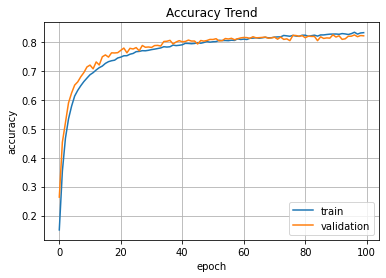

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

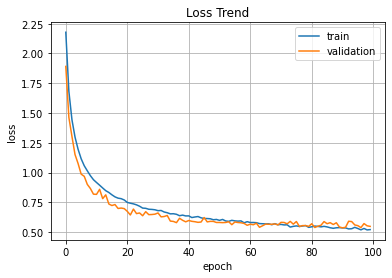

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

In [9]:
# 모델 저장

try:
    cnn.save('./cifar10_accuracy_80.h5')
    print('Done !!!')

except Exception as err:

    print(str(err))

Done !!!
